# Import neccesary libraries

In [1]:
# neccesities
import os
import sys
import numpy as np

# plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib ipympl

# my developer version of pyTEMlib
sys.path.insert(0,'/Users/austin/Documents/GitHub/SciFiReaders/')
sys.path.insert(0,'/Users/austin/Documents/GitHub/pyTEMlib')
import pyTEMlib
import pyTEMlib.image_tools as it
import pyTEMlib.file_tools as ft
import pyTEMlib.kinematic_scattering as ks
print(pyTEMlib.__version__)

# simulation
from ase.io import read
from ase.visualize import view
import itertools 

from scipy.signal import savgol_filter


You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Symmetry functions of spglib enabled
Qt dialogs are not available
Using kinematic_scattering library version {_version_ }  by G.Duscher
0.2023.9.19.dev1


# Load data

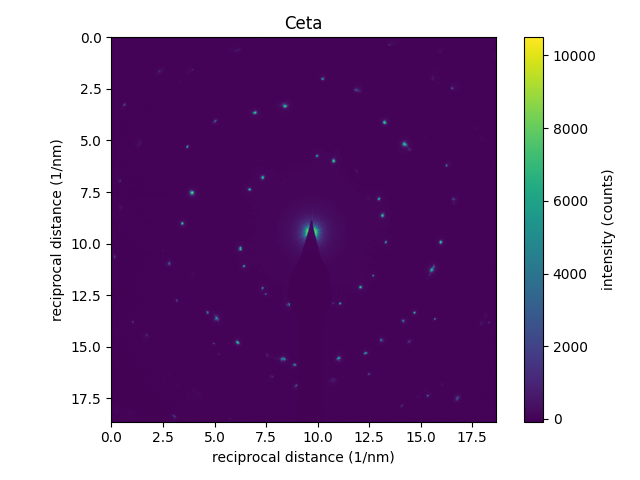

In [6]:
path = '/Users/austin/Desktop/Projects/WS2_twist/WS2_15deg/20230303/20230303 1640 Camera Ceta 460 mm.emd'
dataset = ft.open_file(path)

diff = dataset['Channel_000']
scale = np.gradient(diff.dim_0.values)[0]

view = diff.plot()

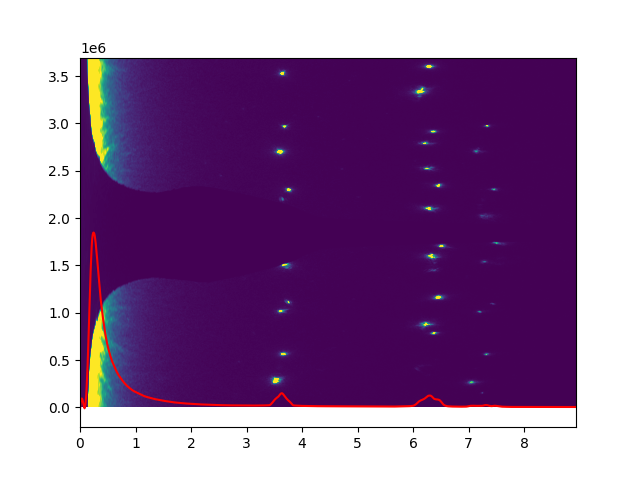

In [10]:
# find center and sum radially

center = [9.71,9.42]

polar_projection = it.warp(diff,center)
polar_projection[polar_projection<0]=0. # get rid of negative value
profile = polar_projection.sum(axis=0)
smoothed_profile = savgol_filter(profile, window_length=20, polyorder=3)
profile_x = scale * np.linspace(0, np.shape(profile)[0], np.shape(profile)[0], endpoint=True)


fig, ax = plt.subplots(1, 1, sharex = True)

extent = [0,np.max(profile_x),0,np.max(smoothed_profile)]
ax.imshow(polar_projection, vmax = 4000, extent = extent, aspect = 'auto')
ax.plot(profile_x, 0.5 * smoothed_profile, c = 'r')
